Import the necessary packages into the enviroment and set the seed.

In [1]:
import os

import random
import math
import statistics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
from matplotlib import colors

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Distribution:  Frequency & Probabiliy

Here is an example of a normal frequency distribution with the distribution generated from random numbers.

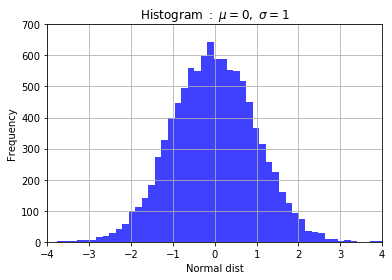

In [2]:
np.random.seed(19680801)

mu, sigma = 0, 1
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, facecolor='blue', alpha=0.75)

plt.xlabel('Normal dist')
plt.ylabel('Frequency')
plt.title(r'$\mathrm{Histogram\ :}\ \mu=0,\ \sigma=1$')
plt.axis([-4, 4, 0, 700])
plt.grid(True)

plt.show()

Here is an example of a normal probability distribution, generated from a ranom number generator. The red dotted line indicates the theoritical normal distribution with a mean of 0, and a SD of 1.

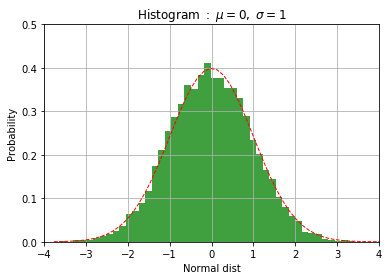

In [3]:
np.random.seed(19680801)

mu, sigma = 0, 1
x = mu + sigma*np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, normed=1, facecolor='green', alpha=0.75)

# add a normal distribution line
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=1)

plt.xlabel('Normal dist')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ :}\ \mu=0,\ \sigma=1$')
plt.axis([-4, 4, 0, 0.5])
plt.grid(True)

plt.show()

# Examples of Normal distributions in Cats

Normal distributions ccan be seen in human height, weight, test scores, bills... etc. We are going to look at cat weights in kg.

Adult (over 2kg in weight) cats used for experiments with the drug digitalis had their heart and body weight recorded.

In [4]:
catsM = pd.read_csv('catsM.csv')

# Cat Body weight in kg.
Bwt = np.array(catsM['Bwt'])
M_Bwt = statistics.mean(Bwt)
SD_Bwt = statistics.stdev(Bwt)

# Cat Heart weight in g.
Hwt = np.array(catsM['Hwt'])

print(catsM.head(), M_Bwt, SD_Bwt)

(  Sex  Bwt   Hwt
0   M  2.0   6.5
1   M  2.0   6.5
2   M  2.1  10.1
3   M  2.2   7.2
4   M  2.2   7.6, 2.9, 0.4674844025918583)


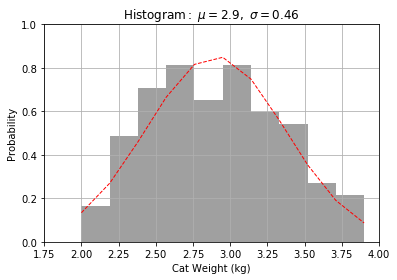

In [5]:
n, bins, patches = plt.hist(Bwt, 10, normed=1, facecolor='grey', alpha=0.75)

# add a normal distribution line
y = mlab.normpdf(bins, M_Bwt, SD_Bwt)
l = plt.plot(bins, y, 'r--', linewidth=1)

plt.xlabel('Cat Weight (kg)')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram:}\ \mu=2.9,\ \sigma=0.46$')
plt.axis([1.75, 4, 0, 1])
plt.grid(True)

plt.show()

# Transformation

Example of theoritical transformation of a weibull into a normal. The cyan is a weibull distribution. And the dotted line is the theoritical normal distribution when the mean and standard devation are calculated. Notice how the red line does NOT fit the weibull distribution.

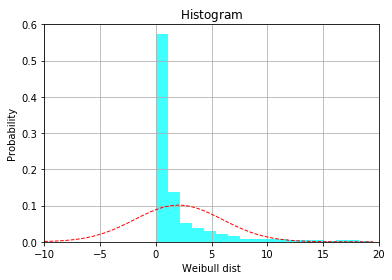

In [6]:
np.random.seed(19680801)

# weibull distribution
a = np.random.weibull(0.5, 1000)
M_a = statistics.mean(a)
SD_a = statistics.stdev(a)

# add a normal distribution line
bins1 = np.arange(-10, 20, 0.5)
y = mlab.normpdf(bins1, M_a, SD_a)
l = plt.plot(bins1, y, 'r--', linewidth=1)

# the histogram of the data
n, bins, patches = plt.hist(a, 50, normed=1, facecolor='cyan', alpha=0.75)

plt.xlabel('Weibull dist')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram}\ \ $')
plt.axis([-10, 20, 0, 0.6])
plt.grid(True)

plt.show()


We can try to do linear transformations (i.e. + - / * ) to the weibull distribution. But we will not get the results desired. A z-test is applied to the data as an example.

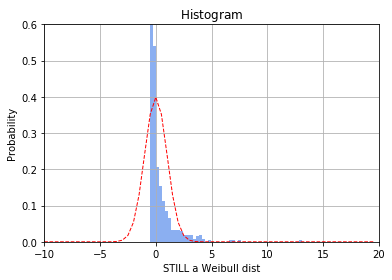

In [7]:
z_data = (a - M_a) / SD_a

M_z = statistics.mean(z_data)
SD_z = statistics.stdev(z_data)

# add a normal distribution line
bins1 = np.arange(-10, 20, 0.5)
y = mlab.normpdf(bins1, M_z, SD_z)
l = plt.plot(bins1, y, 'r--', linewidth=1)

# the histogram of the data
n, bins, patches = plt.hist(z_data, 50, normed=1, facecolor='cornflowerblue', alpha=0.75)

plt.xlabel('STILL a Weibull dist')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram}\ \ $')
plt.axis([-10, 20, 0, 0.6])
plt.grid(True)

plt.show()

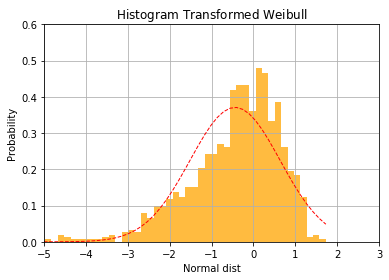

In [8]:
# log transformation
t = np.log10(a)
M_T = statistics.mean(t)
SD_T = statistics.stdev(t)

# the histogram of the data
n, bins, patches = plt.hist(t, 50, normed=1, facecolor='orange', alpha=0.75)

# add a normal distribution line
y = mlab.normpdf(bins, M_T, SD_T)
l = plt.plot(bins, y, 'r--', linewidth=1)

plt.xlabel('Normal dist')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ Transformed\ Weibull}\ \ $')
plt.axis([-5, 3, 0, 0.6])
plt.grid(True)

plt.show()

TEST CASE
Data from a memory retention experiment in which 13 subjects were asked to memorize a list of disconnected items. The subjects were then asked to recall the items at various times up to a week later. The proportion of items (y = prop) correctly recalled at various times (x = time, in minutes) since the list was memorized were recorded and plotted.



In [9]:
df = pd.read_csv('example1.csv')

time = np.array(df['time'])
prop = np.array(df['prop'])

# reshape input to be [samples, time steps, features]
propX = np.reshape(prop, (13, 1))
timeX = np.reshape(time, (13, 1))


Build a simple linear regression & plot.

/Users/sarahewing/anaconda/lib/python2.7/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


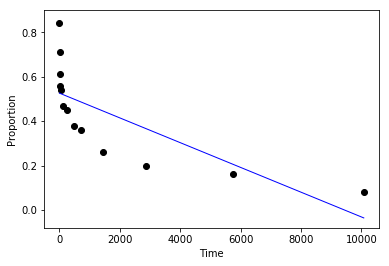

In [10]:
# Create linear regression object
reg = linear_model.LinearRegression()

# Train the model using the training sets
reg.fit (timeX, prop)
reg.coef_

predicted = reg.predict(timeX)

fig, ax = plt.subplots()
plt.scatter(time, prop,  color='black')
plt.plot(time, predicted, color='blue', linewidth=1)
ax.set_xlabel('Time')
ax.set_ylabel('Proportion')
plt.show()

Look at the distributions of prop & time.

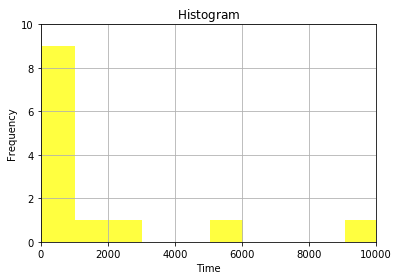

In [11]:
# the histogram of the data
n, bins, patches = plt.hist(time, 10, normed=0, facecolor='yellow', alpha=0.75)

plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title(r'$\mathrm{Histogram\ }\ \ \ \ $')
plt.axis([0, 10000, 0, 10])
plt.grid(True)

plt.show()

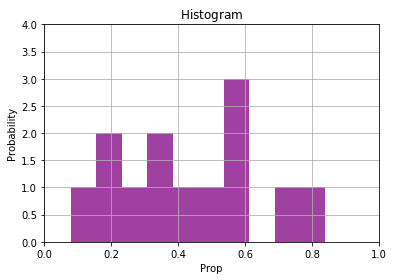

In [12]:
# the histogram of the data
n, bins, patches = plt.hist(prop, 10, normed=0, facecolor='purple', alpha=0.75)

plt.xlabel('Prop')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ }\ \ \ \ $')
plt.axis([0, 1, 0, 4])
plt.grid(True)

plt.show()

Here is a residual plot - it should just look like random noise. As you can see it does not. There is a pattern - and it almost makes me want to fit a regression to it.

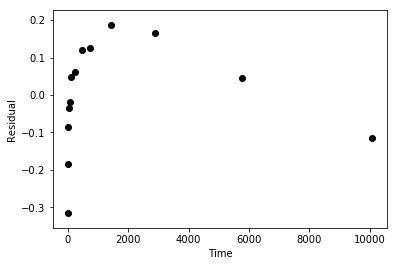

In [13]:
residual = predicted - prop
fig, ax = plt.subplots()
plt.scatter(time, residual,  color='black')
ax.set_xlabel('Time')
ax.set_ylabel('Residual')
plt.show()

So we can see that something needs to be transformed into a normal distribution because regression assumes normality. You can argue that prop is normal, and I'd believe you. But if you tried to argue that time was normal - I'd have to disagree so lets try transforming the time.

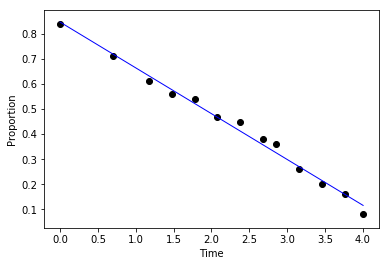

In [14]:
# log transformation
timeT = np.log10(timeX)

# Train the model using the training sets
reg.fit (timeT, prop)
reg.coef_

predictedT = reg.predict(timeT)

fig, ax = plt.subplots()
plt.scatter(timeT, prop,  color='black')
plt.plot(timeT, predictedT, color='blue', linewidth=1)
ax.set_xlabel('Time')
ax.set_ylabel('Proportion')
plt.show()

Now the time variable looks a little more normlized than before, as you can see in the histogram.

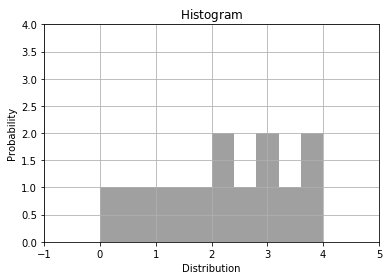

In [15]:
# the histogram of the data
n, bins, patches = plt.hist(timeT, 10, normed=0, facecolor='grey', alpha=0.75)

plt.xlabel('Distribution')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ }\ \ \ \ $')
plt.axis([-1, 5, 0, 4])
plt.grid(True)

plt.show()

This residual plot looks a lot more random than before.

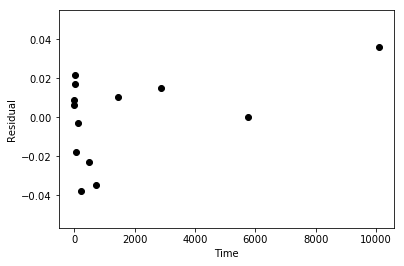

In [16]:
residual = predictedT - prop
fig, ax = plt.subplots()
plt.scatter(time, residual,  color='black')
ax.set_xlabel('Time')
ax.set_ylabel('Residual')
plt.show()